# Story 2: Federal Reserve Mandate Analysis

## Abstract
The Federal Reserve has a dual mandate from Congress: to control inflation and to maintain low unemployment. These objectives can often appear contradictory, as measures to control inflation—such as raising interest rates—can lead to higher unemployment. This project investigates whether the Fed has successfully balanced these goals over the past 20 years.

## Introduction
To evaluate the Fed's performance, we analyze three key economic indicators:
- **Consumer Price Index (CPI)**: Measures inflation.
- **Federal Funds Rate**: The interest rate set by the Fed.
- **Unemployment Rate**: Indicates labor market health.

Using data sourced from the Bureau of Labor Statistics (BLS) and the Federal Reserve Economic Data (FRED), we visualize trends and correlations among these indicators to assess the effectiveness of the Fed's policy decisions.

### Key Question:
**Has the FED been able to fulfill the mandate given to it by Congress?**


## Step 1 - Data Retrival and Preparation
### Objective: CPI Data via BLS API (v2)
In this step, we retrieve the Consumer Price Index (CPI) data from the Bureau of Labor Statistics (BLS) using their version 2 API with an authenticated API key. The CPI is a primary measure of inflation and a critical indicator for evaluating the Federal Reserve’s success in maintaining price stability.

We request monthly CPI data for the past 20 years, clean and format it into a structured time series.

This dataset will be used to:
- Analyze long-term inflation trends.
- Compare CPI movements with changes in interest rates and unemployment.
- Assess whether the Fed’s monetary policy actions have effectively managed inflation in accordance with its congressional mandate.

In [18]:
import requests
import pandas as pd
from datetime import datetime
from google.colab import userdata
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

api_key = userdata.get('BLS_API_KEY')
series_id = "CUUR0000SA0"

# Define the time range
start_year = datetime.now().year - 20
end_year = datetime.now().year

# Create the request payload
payload = {
    "seriesid": [series_id],
    "startyear": str(start_year),
    "endyear": str(end_year),
    "registrationkey": api_key
}

# Send the request to BLS API v2
response = requests.post("https://api.bls.gov/publicAPI/v2/timeseries/data/", json=payload)
data = response.json()
print(data)

# Extract and format the data
cpi_data = data['Results']['series'][0]['data']
cpi_df = pd.DataFrame(cpi_data)
cpi_df['date'] = pd.to_datetime(cpi_df['year'] + '-' + cpi_df['period'].str[1:] + '-01')
cpi_df['cpi'] = pd.to_numeric(cpi_df['value'])
cpi_df = cpi_df[['date', 'cpi']].sort_values('date')


# Display the first few rows
print(cpi_df.head())


{'status': 'REQUEST_SUCCEEDED', 'responseTime': 145, 'message': ['Year range has been reduced to the system-allowed limit of 20 years.'], 'Results': {'series': [{'seriesID': 'CUUR0000SA0', 'data': [{'year': '2024', 'period': 'M12', 'periodName': 'December', 'value': '315.605', 'footnotes': [{}]}, {'year': '2024', 'period': 'M11', 'periodName': 'November', 'value': '315.493', 'footnotes': [{}]}, {'year': '2024', 'period': 'M10', 'periodName': 'October', 'value': '315.664', 'footnotes': [{}]}, {'year': '2024', 'period': 'M09', 'periodName': 'September', 'value': '315.301', 'footnotes': [{}]}, {'year': '2024', 'period': 'M08', 'periodName': 'August', 'value': '314.796', 'footnotes': [{}]}, {'year': '2024', 'period': 'M07', 'periodName': 'July', 'value': '314.540', 'footnotes': [{}]}, {'year': '2024', 'period': 'M06', 'periodName': 'June', 'value': '314.175', 'footnotes': [{}]}, {'year': '2024', 'period': 'M05', 'periodName': 'May', 'value': '314.069', 'footnotes': [{}]}, {'year': '2024', 

## Objective: Federal Funds Rate Data Preparation
In this step, we load and prepare the Federal Funds Rate data sourced from the Federal Reserve Economic Data (FRED). This interest rate is a primary tool used by the Federal Reserve to influence inflation and employment, making it a critical variable in evaluating the Fed’s policy effectiveness.

The dataset is cleaned and filtered to include only the last 20 years of monthly observations. The date column is converted to a proper datetime format, and the data is structured for time-series analysis.

This dataset will be used to:

- Visualize how the Fed has adjusted interest rates over time.
- Compare rate changes with inflation (CPI) and unemployment trends.
- Assess whether rate decisions align with the Fed’s dual mandate.

In [27]:
# Load the Federal Funds Rate data
df_fed = pd.read_csv("/content/sample_data/FEDFUNDS.csv")
print(df_fed.head())

# Convert the observation_date column to datetime format
df_fed['observation_date'] = pd.to_datetime(df_fed['observation_date'])

# Rename columns for clarity
df_fed.rename(columns={'observation_date': 'date', 'FEDFUNDS': 'fed_funds_rate'}, inplace=True)

# Filter the last 20 years of data
df_fed = df_fed[df_fed['date'] >= pd.Timestamp.now() - pd.DateOffset(years=20)]

# Display the first few rows
print(df_fed.head())


  observation_date  FEDFUNDS
0       2000-08-01      6.50
1       2000-09-01      6.52
2       2000-10-01      6.51
3       2000-11-01      6.51
4       2000-12-01      6.40
         date  fed_funds_rate
62 2005-10-01            3.78
63 2005-11-01            4.00
64 2005-12-01            4.16
65 2006-01-01            4.29
66 2006-02-01            4.49


## Objective: Unemployment Rate Data via BLS API (v1)
In this step, we retrieve the Unemployment Rate data from the Bureau of Labor Statistics (BLS) using their version 1 public API without authentication. The unemployment rate is a key indicator of labor market health and is essential for evaluating the Federal Reserve’s success in promoting maximum sustainable employment.

We request monthly seasonally adjusted unemployment data for the past 20 years, clean and format it into a structured time series.

This dataset will be used to:
- Analyze long-term employment trends and cycles.
- Compare unemployment movements with changes in inflation and interest rates.
- Assess whether the Fed’s monetary policy actions have effectively supported employment in accordance with its congressional mandate.

In [20]:
series_id = "LNS14000000"
start_year = datetime.now().year - 20
end_year = datetime.now().year

# Create the request payload with API key
payload = {
    "seriesid": [series_id],
    "startyear": str(start_year),
    "endyear": str(end_year),
    "registrationkey": api_key
}

# Send the request to BLS API v1
response = requests.post("https://api.bls.gov/publicAPI/v2/timeseries/data/", json=payload)
data = response.json()
print(data)

# Extract and format the data
unemp_data = data['Results']['series'][0]['data']

unemp_df = pd.DataFrame(unemp_data)
unemp_df['date'] = pd.to_datetime(unemp_df['year'] + '-' + unemp_df['period'].str[1:] + '-01')
unemp_df['unemployment_rate'] = pd.to_numeric(unemp_df['value'])
unemp_df = unemp_df[['date', 'unemployment_rate']].sort_values('date')

# Display the first few rows
print(unemp_df.head())


{'status': 'REQUEST_SUCCEEDED', 'responseTime': 127, 'message': ['Year range has been reduced to the system-allowed limit of 20 years.'], 'Results': {'series': [{'seriesID': 'LNS14000000', 'data': [{'year': '2024', 'period': 'M12', 'periodName': 'December', 'value': '4.1', 'footnotes': [{}]}, {'year': '2024', 'period': 'M11', 'periodName': 'November', 'value': '4.2', 'footnotes': [{}]}, {'year': '2024', 'period': 'M10', 'periodName': 'October', 'value': '4.1', 'footnotes': [{}]}, {'year': '2024', 'period': 'M09', 'periodName': 'September', 'value': '4.1', 'footnotes': [{}]}, {'year': '2024', 'period': 'M08', 'periodName': 'August', 'value': '4.2', 'footnotes': [{}]}, {'year': '2024', 'period': 'M07', 'periodName': 'July', 'value': '4.2', 'footnotes': [{}]}, {'year': '2024', 'period': 'M06', 'periodName': 'June', 'value': '4.1', 'footnotes': [{}]}, {'year': '2024', 'period': 'M05', 'periodName': 'May', 'value': '4.0', 'footnotes': [{}]}, {'year': '2024', 'period': 'M04', 'periodName': '

## **Visualizations**:

Over the past 20 years, the Federal Reserve has faced multiple economic challenges—from the 2008 financial crisis to the COVID-19 pandemic. By analyzing inflation, unemployment, and interest rate trends, we can assess how well the Fed balanced its dual mandate:
 - price stability
 - maximum employment.

In [21]:
# Merge all datasets on date
merged_df = pd.merge(cpi_df, df_fed[['date', 'fed_funds_rate']], on='date', how='inner')
merged_df = pd.merge(merged_df, unemp_df, on='date', how='inner')

# Set plot style
sns.set(style="whitegrid")

### CPI Over Time
CPI (Consumer Price Index) shows how prices have changed over time.

Purpose: Helps us to see if inflation has been stable or rising. If prices are rising too fast, it means inflation is high, which the Fed is supposed to control.

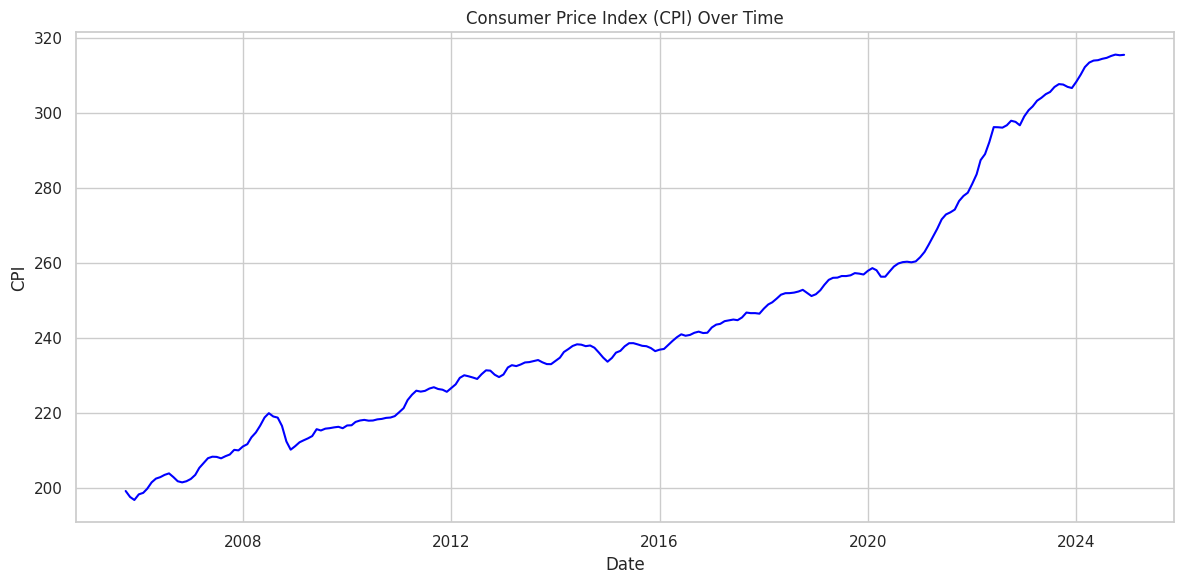

In [22]:
# Plot CPI over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='date', y='cpi', color='blue')
plt.title('Consumer Price Index (CPI) Over Time')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.tight_layout()
plt.show()

The Consumer Price Index shows a steady rise over time, which is expected in a growing economy.
However, there are periods—especially around 2021–2022—where inflation accelerated sharply.
This suggests that while the Fed generally kept inflation in check, it struggled during global disruptions like the pandemic.

### Federal Funds Rate Over Time

This is the interest rate the Fed sets to influence the economy.

Purpose: Shows how the Fed has responded to inflation or unemployment. For example, raising rates usually helps lower inflation but can also slow down job growth.

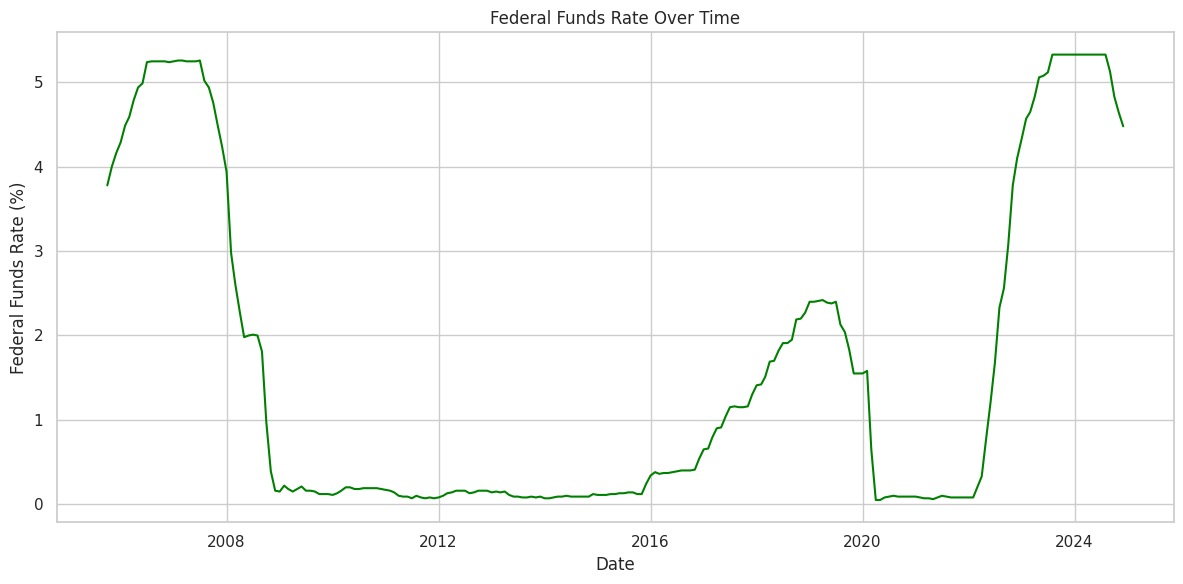

In [23]:
# Plot Federal Funds Rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='date', y='fed_funds_rate', color='green')
plt.title('Federal Funds Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Federal Funds Rate (%)')
plt.tight_layout()
plt.show()

The Unemployment Rate spiked during the 2008 crisis and again in early 2020 due to COVID-19.
In both cases, the Fed responded with aggressive rate cuts, and unemployment eventually returned to lower levels.
This shows the Fed was effective in supporting job recovery after major shocks.

### Unemployment Rate Over Time

This shows how many people are out of work.

Purpose: Helps us to see if the Fed has supported job growth. A low unemployment rate means more people have jobs, which is part of the Fed’s mandate.

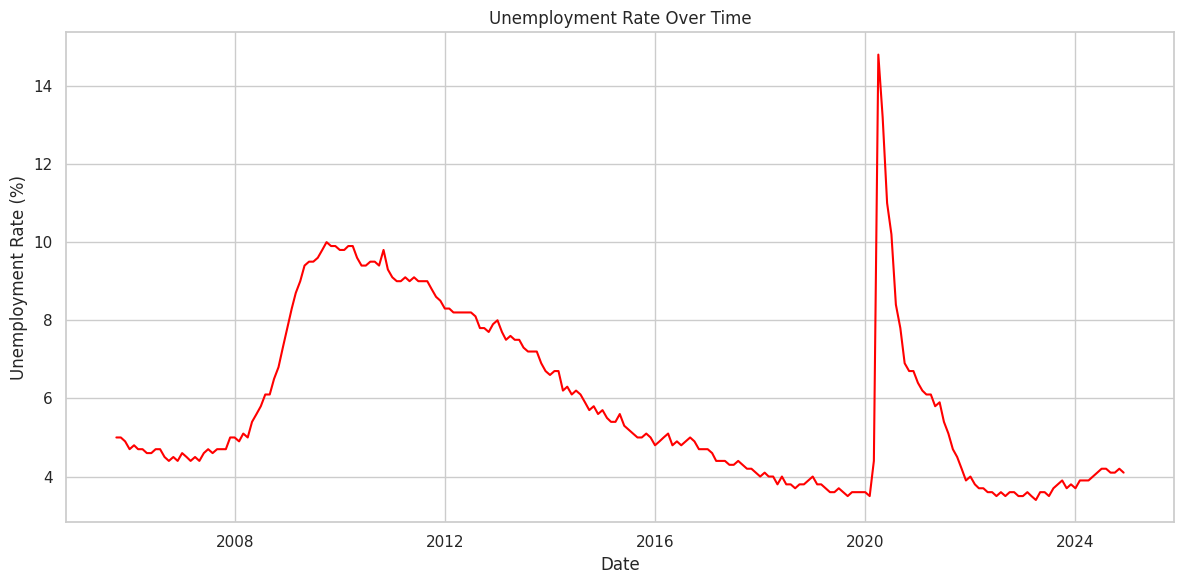

In [24]:
# Plot Unemployment Rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='date', y='unemployment_rate', color='red')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.tight_layout()
plt.show()

The interest rate dropped significantly during crises (2008 and 2020), showing the Fed’s effort to stimulate the economy.
It increased gradually during stable periods, especially from 2016 to 2019 and again after 2022, to combat rising inflation.
These adjustments reflect the Fed’s attempt to balance both sides of its mandate.

### Combined Plot (CPI, Interest Rate, Unemployment) with Shaded Recession Indicator
Seeing all three indicators together helps to understand the trade-offs the Fed has made.

Purpose: We can try to spot patterns whether raising interest rates helped reduce inflation but increased unemployment, or if the Fed managed to keep both inflation and unemployment low at the same time.

Why to add a dhaded recession indicator? Recessions are key moments when the Fed’s actions are most tested.

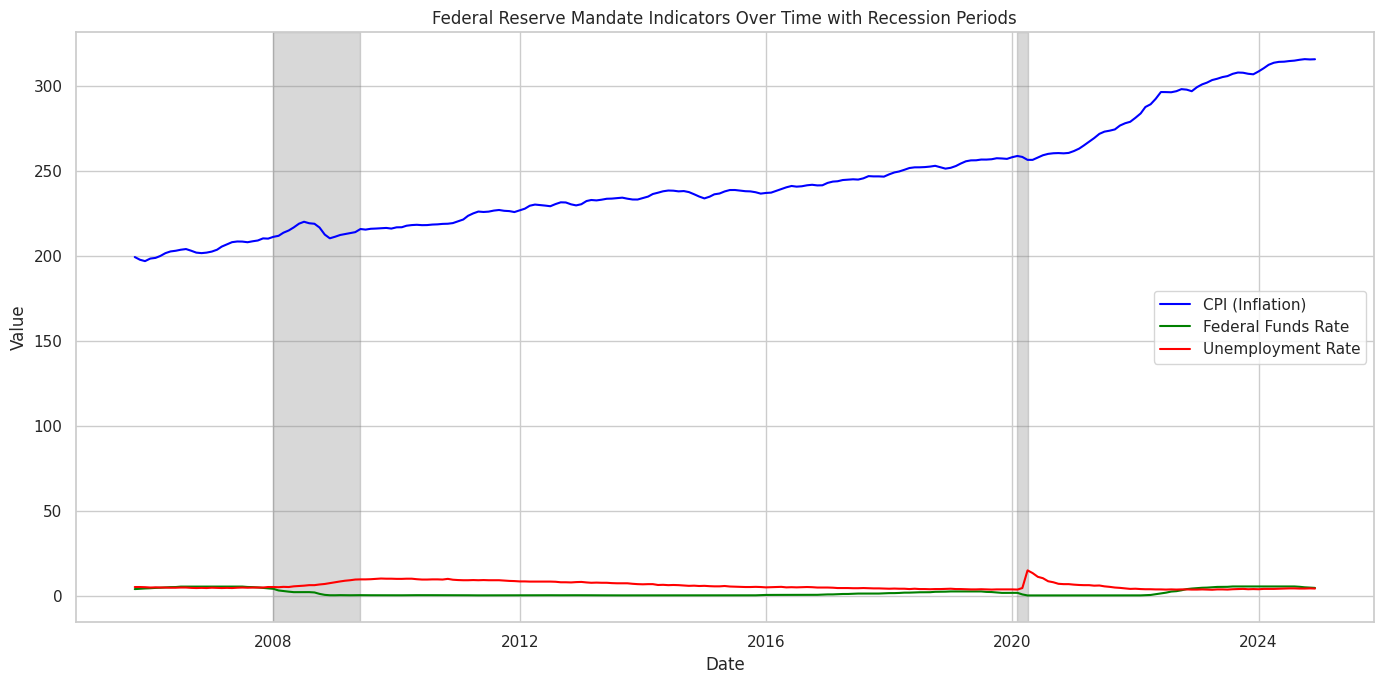

In [30]:
# Recession periods
recessions = [
    ('2008-01-01', '2009-06-01'),  # Great Recession
    ('2020-02-01', '2020-04-01')   # COVID-19 Recession
]

# Combined plot
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# Plot each indicator
sns.lineplot(data=merged_df, x='date', y='cpi', label='CPI (Inflation)', color='blue')
sns.lineplot(data=merged_df, x='date', y='fed_funds_rate', label='Federal Funds Rate', color='green')
sns.lineplot(data=merged_df, x='date', y='unemployment_rate', label='Unemployment Rate', color='red')

# Add shaded regions for recessions
for start, end in recessions:
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='gray', alpha=0.3)

plt.title('Federal Reserve Mandate Indicators Over Time with Recession Periods')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()


### Putting Everything Together
The combined graph shows how the Fed adjusted interest rates in response to spikes in unemployment and inflation. While not perfect, the timing and direction of these changes suggest that the Fed actively tried to balance its dual mandate.

 - During high unemployment, it lowered rates to boost jobs.
 - During high inflation, it raised rates to cool down prices.

### Final Conclusion

#### Statement question: **Has the FED been able to fulfill the mandate given to it by Congress?**

The Fed has mostly fulfilled its mandate, though with some lag during extreme events. Its policy decisions show a clear effort to stabilize both inflation and employment, even if perfect balance wasn’t always possible.